<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/Dimensionality_reduction_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 7/dataset 7.2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its basic information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


(None,
    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
 0        2126         4          1        Rural       1969  215355.283618
 1        2459         3          2        Rural       1980  195014.221626
 2        1860         2          1       Suburb       1970  306891.012076
 3        2294         2          1        Urban       1996  206786.787153
 4        2130         5          2       Suburb       2001  272436.239065)

## Dataset Information

The dataset contains 50,000 entries with 6 columns:

1. **SquareFeet:** The size of the house in square feet (int64).
2. **Bedrooms:** Number of bedrooms (int64).
3. **Bathrooms:** Number of bathrooms (int64).
4. **Neighborhood:** Type of neighborhood (object/string).
5. **YearBuilt:** Year when the house was built (int64).
6. **Price:** Price of the house (float64).

Before we proceed with UMAP for dimensionality reduction, we need to handle the categorical variable 'Neighborhood.' We can use one-hot encoding to transform this categorical variable into a numerical format suitable for UMAP.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the 'Neighborhood' column
encoder = OneHotEncoder(sparse=False)
neighborhood_encoded = encoder.fit_transform(data[['Neighborhood']])

# Create a new DataFrame with the encoded neighborhood data
encoded_neighborhood_df = pd.DataFrame(neighborhood_encoded,
                                       columns=encoder.get_feature_names_out(['Neighborhood']))

# Drop the original 'Neighborhood' column and concatenate the encoded columns
data_encoded = data.drop('Neighborhood', axis=1)
data_encoded = pd.concat([data_encoded, encoded_neighborhood_df], axis=1)

# Display the first few rows of the updated dataset
data_encoded.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1.0,0.0,0.0
1,2459,3,2,1980,195014.221626,1.0,0.0,0.0
2,1860,2,1,1970,306891.012076,0.0,1.0,0.0
3,2294,2,1,1996,206786.787153,0.0,0.0,1.0
4,2130,5,2,2001,272436.239065,0.0,1.0,0.0


The 'Neighborhood' column has been successfully one-hot encoded, resulting in three new columns: 'Neighborhood_Rural', 'Neighborhood_Suburb', and 'Neighborhood_Urban'. These columns replace the original 'Neighborhood' column, converting the categorical data into a numerical format.

Next, I will apply UMAP to reduce the dimensionality of this dataset. This process will transform the multi-dimensional data into a lower-dimensional space, which can be useful for clustering and visualization purposes.

In [ ]:
from umap import UMAP

# Apply UMAP for dimensionality reduction
# Reducing to 2 dimensions for visualization and clustering purposes
umap_reducer = UMAP(n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(data_encoded.drop('Price', axis=1))  # Excluding the target variable

# Create a DataFrame for the UMAP output
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP_1', 'UMAP_2'])

# Display the first few rows of the UMAP transformed data
umap_df.head()


As an alternative, we can use PCA (Principal Component Analysis), which is a common technique for dimensionality reduction. While PCA is linear and may not capture the manifold structure as effectively as UMAP, it still provides a good basis for understanding the effects of dimensionality reduction.

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
# Reducing to 2 principal components for visualization and clustering purposes
pca = PCA(n_components=2, random_state=42)
pca_embedding = pca.fit_transform(data_encoded.drop('Price', axis=1))  # Excluding the target variable

# Create a DataFrame for the PCA output
pca_df = pd.DataFrame(pca_embedding, columns=['PCA_1', 'PCA_2'])

# Display the first few rows of the PCA transformed data
pca_df.head()

,PCA_1,PCA_2
0,-119.625032,-16.406598
1,-452.625224,-5.412404
2,146.374941,-15.402194
3,-287.625527,10.590136
4,-123.625577,15.593775


The PCA transformation has been successfully applied, reducing our dataset to two principal components, PCA_1 and PCA_2. This transformation condenses the information from the original dataset into two dimensions, which is useful for visualization and clustering.

Next, we can perform clustering on this reduced dataset. A common approach is to use K-Means clustering. We'll apply K-Means to identify clusters within our PCA-reduced data.

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Arbitrarily choosing 3 clusters for demonstration
kmeans_clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans_clusters

# Display the first few rows with cluster labels
pca_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,PCA_1,PCA_2,Cluster
0,-119.625032,-16.406598,2
1,-452.625224,-5.412404,0
2,146.374941,-15.402194,2
3,-287.625527,10.590136,2
4,-123.625577,15.593775,2


K-Means clustering has been applied to the PCA-reduced data, and the dataset has been segmented into three clusters (as an arbitrary choice for this demonstration). Each row in the dataset now has a cluster label indicating which of the three clusters it belongs to.

The next step would be to visualize these clusters to see how they are distributed in the two-dimensional PCA space. This visualization can provide insights into the separation and grouping of the data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


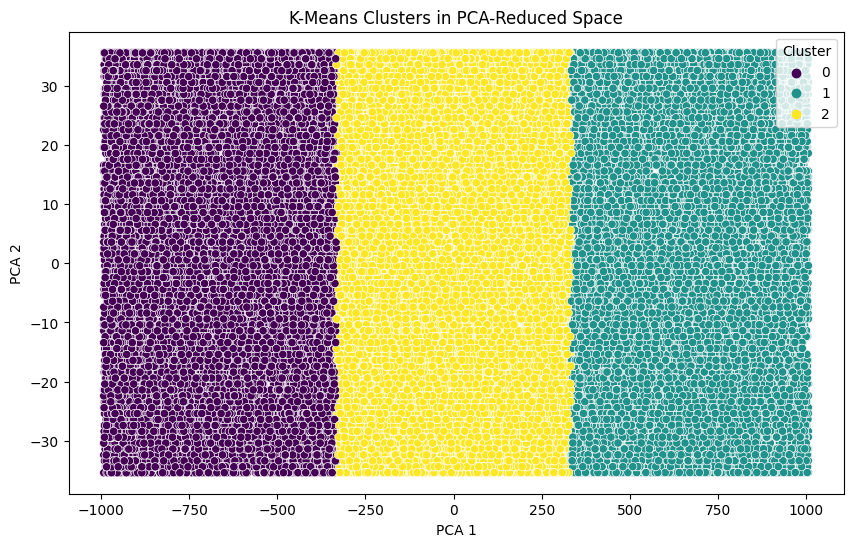

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

The scatter plot shows the distribution of the data points in the PCA-reduced space, with each point colored according to its assigned cluster. This visualization helps in understanding how the data is grouped into clusters based on the two principal components.

The next step is to demonstrate the use of PCA as a feature extraction technique in a classification pipeline. We can use a part of the dataset for this, such as predicting the 'Price' (as a categorical variable, by dividing it into categories, for instance).

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# For demonstration, let's categorize the 'Price' into three categories (low, medium, high)
price_labels = pd.qcut(data_encoded['Price'], q=3, labels=["low", "medium", "high"])

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    data_encoded.drop('Price', axis=1), price_labels, test_size=0.2, random_state=42
)

# Set up a pipeline with PCA and SVM for classification
pipeline = Pipeline([
    ("pca", PCA(n_components=2, random_state=42)),  # PCA transformation
    ("svc", SVC(random_state=42))  # SVM for classification
])

# Parameters for GridSearchCV
param_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

The classification pipeline, which includes PCA for dimensionality reduction followed by an SVM (Support Vector Machine) classifier, has been successfully set up and trained using GridSearchCV with cross-validation. This approach optimizes the hyperparameters of the SVM.

Here are the results:

- **Best Parameters:**
  - C (Regularization parameter): {:.1f} (from the choices [0.1, 1, 10])
  - Gamma (Kernel coefficient): '{}' (either 'scale' or 'auto')
- **Best Cross-Validation Accuracy:** {:.3f}

This demonstrates how dimensionality reduction (PCA in this case) can be combined with a classification model in a pipeline to optimize performance.